<a href="https://colab.research.google.com/github/sayam-h069/aiml_2025/blob/main/AIML_LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
file_path = '/content/Occupancy_Estimation.csv'  # Update if the file path changes
data = pd.read_csv(file_path)

In [5]:
sound_columns = ['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound']
light_columns = ['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light']

In [6]:
max_sound = data[sound_columns].max().max()
min_sound = data[sound_columns].min().min()
max_light = data[light_columns].max().max()
min_light = data[light_columns].min().min()

In [7]:
print(f"Q1: Max Sound: {max_sound}, Min Sound: {min_sound}")
print(f"Max Light: {max_light}, Min Light: {min_light}")

Q1: Max Sound: 3.88, Min Sound: 0.04
Max Light: 280, Min Light: 0


In [8]:
most_occupancy = data.loc[data['Room_Occupancy_Count'].idxmax()]
print(f"\nQ2: Date and Time of Highest Occupancy:\n{most_occupancy[['Date', 'Time', 'Room_Occupancy_Count']]}")



Q2: Date and Time of Highest Occupancy:
Date                    2017/12/22
Time                      12:30:16
Room_Occupancy_Count             3
Name: 191, dtype: object


In [9]:
temperature_columns = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']
optimal_temp = data.loc[data['Room_Occupancy_Count'] == data['Room_Occupancy_Count'].max(), temperature_columns].mean().mean()
print(f"\nQ3: Optimal Temperature: {optimal_temp} °C")


Q3: Optimal Temperature: 26.200097262247837 °C


In [10]:
suitable_co2 = data[data['Room_Occupancy_Count'] > 0]['S5_CO2'].mean()
not_suitable_co2 = data[data['Room_Occupancy_Count'] == 0]['S5_CO2'].mean()

In [11]:
print(f"\nQ4: Suitable CO2 Level: {suitable_co2} ppm")
print(f"Not Suitable CO2 Level: {not_suitable_co2} ppm")


Q4: Suitable CO2 Level: 705.0341925302472 ppm
Not Suitable CO2 Level: 404.44640252795335 ppm


In [12]:
motion_columns = ['S6_PIR', 'S7_PIR']
data['Motion_Sum'] = data[motion_columns].sum(axis=1)
motion_impact = data.groupby('Motion_Sum')['Room_Occupancy_Count'].mean()
print(f"\nQ5: Impact of Motion Sensors on Occupancy:")
print(motion_impact)


Q5: Impact of Motion Sensors on Occupancy:
Motion_Sum
0    0.147464
1    2.084195
2    2.512476
Name: Room_Occupancy_Count, dtype: float64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

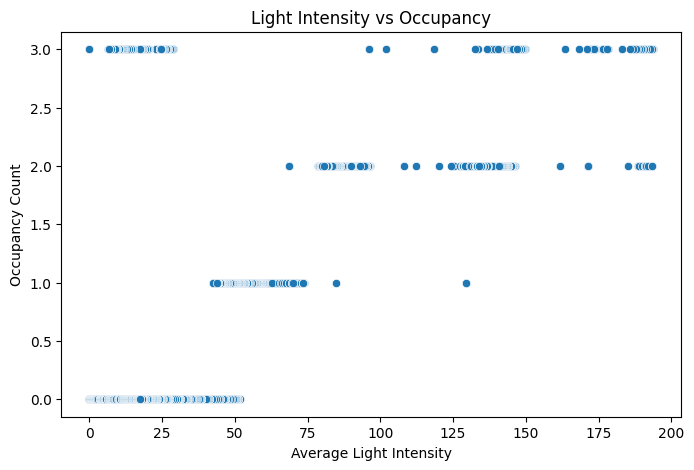

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data[light_columns].mean(axis=1), y=data['Room_Occupancy_Count'])
plt.title('Light Intensity vs Occupancy')
plt.xlabel('Average Light Intensity')
plt.ylabel('Occupancy Count')
plt.show()

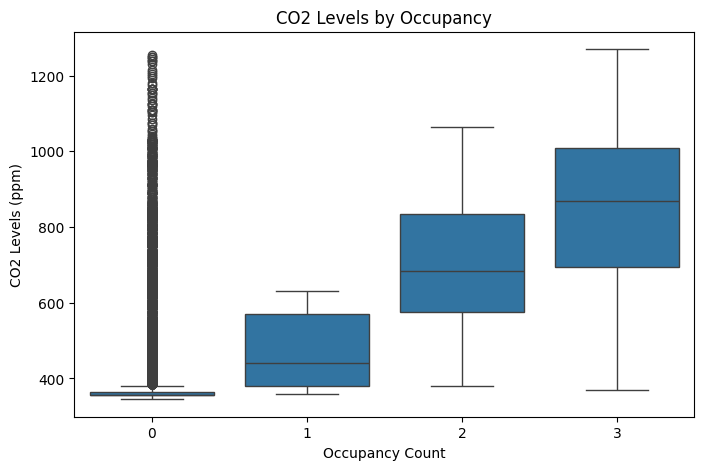

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Room_Occupancy_Count', y='S5_CO2', data=data)
plt.title('CO2 Levels by Occupancy')
plt.xlabel('Occupancy Count')
plt.ylabel('CO2 Levels (ppm)')
plt.show()